In [5]:
import pandas as pd
import numpy as np
from random import sample
from pandas import *
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

print 'Pandas version: ' + pd.__version__

Pandas version: 0.14.0


In [6]:
# This section reads a csv file and tests to make sure the header is correct

df = pd.read_csv(r"C:\Users\dustin\Dropbox\AKWarm Documentation\02. Work\01. Task 2 - AKWarm library update\Climate Library\NOAA 1981 - 2010 Alaska Hourly Wind Speeds.csv", index_col=None, header=0)
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HLY-WIND-AVGSPD,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-WIND-PCTCLM,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT
0,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,20100101 00:00,51,13,43,242,1,401,2,225
1,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,20100101 01:00,52,11,43,240,1,392,2,213
2,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,20100101 02:00,52,10,43,261,1,360,2,199
3,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,20100101 03:00,51,10,43,254,1,395,2,180
4,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,20100101 04:00,54,14,45,232,1,373,2,253


In [7]:
# Converts to pandas datetime

df['DATE'] = to_datetime(df['DATE'])
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HLY-WIND-AVGSPD,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-WIND-PCTCLM,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT
0,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 00:00:00,51,13,43,242,1,401,2,225
1,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 01:00:00,52,11,43,240,1,392,2,213
2,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 02:00:00,52,10,43,261,1,360,2,199
3,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 03:00:00,51,10,43,254,1,395,2,180
4,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 04:00:00,54,14,45,232,1,373,2,253


In [8]:
noaa_index = list(df['STATION_NAME'].unique())
noaa_index


['TALKEETNA AIRPORT AK US',
 'HOMER AIRPORT AK US',
 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US',
 'ST PAUL ISLAND AIRPORT AK US',
 'MCGRATH AIRPORT AK US',
 'BARROW W POST W ROGERS AIRPORT AK US',
 'GULKANA AIRPORT AK US',
 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US',
 'BIG DELTA AIRPORT AK US',
 'COLD BAY AIRPORT AK US',
 'BETTLES AIRPORT AK US',
 'YAKUTAT AIRPORT AK US',
 'BETHEL AIRPORT AK US',
 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK ',
 'KODIAK AIRPORT AK US',
 'JUNEAU INTERNATIONAL AIRPORT AK US',
 'VALDEZ WEATHER SERVICE OFFICE AK US',
 'NOME MUNICIPAL AIRPORT AK US',
 'KING SALMON AIRPORT AK US',
 'FAIRBANKS INTERNATIONAL AIRPORT AK US']

In [9]:
df.dtypes

STATION                    object
STATION_NAME               object
ELEVATION                 float64
LATITUDE                  float64
LONGITUDE                 float64
DATE               datetime64[ns]
HLY-WIND-AVGSPD             int64
HLY-WIND-VCTDIR             int64
HLY-WIND-VCTSPD             int64
HLY-WIND-PCTCLM             int64
HLY-WIND-1STDIR             int64
HLY-WIND-1STPCT             int64
HLY-WIND-2NDDIR             int64
HLY-WIND-2NDPCT             int64
dtype: object

In [10]:
# Creates month column
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
# Hourly wind speeds are in tenths of MPH, converts to just MPH in a new column
df['WINDSPEED_MPH'] = df['HLY-WIND-AVGSPD'].map(lambda x: float(x) / 10)
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HLY-WIND-AVGSPD,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-WIND-PCTCLM,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,MONTH,WINDSPEED_MPH
0,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 00:00:00,51,13,43,242,1,401,2,225,1,5.1
1,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 01:00:00,52,11,43,240,1,392,2,213,1,5.2
2,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 02:00:00,52,10,43,261,1,360,2,199,1,5.2
3,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 03:00:00,51,10,43,254,1,395,2,180,1,5.1
4,GHCND:USW00026528,TALKEETNA AIRPORT AK US,106.7,62.32,-150.095,2010-01-01 04:00:00,54,14,45,232,1,373,2,253,1,5.4


In [11]:
# Averages by month
monthly_wind = df.groupby(['STATION_NAME','MONTH']).mean()

# Show only monthly avg wind speed
monthly_wind = monthly_wind[['WINDSPEED_MPH']]
monthly_wind

WINDSPEED_MPH
STATION_NAME                                      MONTH               
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 1           6.667876
                                                  2           6.743601
                                                  3           7.318439
                                                  4           7.370972
                                                  5           8.369624
                                                  6           8.298333
                                                  7           7.433602
                                                  8           6.902419
                                                  9           7.049861
                                                  10          6.784543
                                                  11          6.671944
                                                  12          6.330108
ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US      1           9.518750
                                                  2           9.200893
                                                  3           9.432727
                                                  4           8.960417
                                                  5           8.109274
                                                  6           7.740625
                                                  7           7.068952
                                                  8           7.144960
                                                  9           7.536875
                                                  10          8.958468
                                                  11          9.486042
                                                  12          9.409677
BARROW W POST W ROGERS AIRPORT AK US              1          12.427688
                                                  2          12.615179
                                                  3          11.739704
                                                  4          11.905000
                                                  5          12.459005
                                                  6          12.049167
...                                                                ...
TALKEETNA AIRPORT AK US                           3           5.591215
                                                  4           4.828201
                                                  5           5.065230
                                                  6           5.129091
                                                  7           4.670088
                                                  8           3.795104
                                                  9           3.762158
                                                  10          4.051906
                                                  11          4.955887
                                                  12          5.162536
VALDEZ WEATHER SERVICE OFFICE AK US               1           7.520455
                                                  2           7.419126
                                                  3           7.000000
                                                  4           6.419192
                                                  5           7.882857
                                                  6           8.476301
                                                  7           7.905941
                                                  8           6.833333
YAKUTAT AIRPORT AK US                             1           6.046640
                                                  2           5.862054
                                                  3           6.302961
                                                  4           5.958056
                                                  5           6.019086
                                                  6           5.713889
          

In [12]:
monthly_wind_noindex = monthly_wind.reset_index()
monthly_wind_noindex


,STATION_NAME,MONTH,WINDSPEED_MPH
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,6.667876
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,6.743601
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,7.318439
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,7.370972
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,8.369624
5,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,6,8.298333
6,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,7,7.433602
7,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,8,6.902419
8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,9,7.049861
9,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,10,6.784543


In [13]:
monthly_wind.to_excel('NOAA_Monthly_Wind_30_Year_Avg_Alaska.xlsx', sheet_name="First_Order_Sites")

In [14]:
# List of just tmy sites with matching NOAA first order site
tmy_ids = [
    (702730, 'Anchorage Intl AP', 'II'),
    (703980, 'Annette Island AP', 'II'),
    (700260, 'Barrow W Post-W Rogers Arpt [NSA - ARM]', 'II'),
    (702190, 'Bethel Airport', 'II'),
    (701740, 'Bettles Field', 'II'),
    (702670, 'Big Delta Allen AAF', 'II'),
    (703160, 'Cold Bay Arpt', 'II'),
    (702610, 'Fairbanks Intl Arpt', 'II'),
    (702710, 'Gulkana Intermediate Field', 'II'),
    (703410, 'Homer Arpt', 'II'),
    (703810, 'Juneau Intl Arpt', 'II'),
    (703260, 'King Salmon Arpt', 'II'),
    (703500, 'Kodiak Airport', 'II'),
    (701330, 'Kotzebue Ralph Wein Memorial', 'II'),
    (702310, 'McGrath Arpt', 'II'),
    (702000, 'Nome Municipal Arpt', 'II'),
    (703080, 'St Paul Island Arpt', 'II'),
    (702510, 'Talkeetna State Arpt', 'II'),
    (702750, 'Valdez Wso', 'II'),
    (703610, 'Yakutat State Arpt', 'II')
]

In [15]:
noaa_index.sort()
noaa_index

['ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US',
 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US',
 'BARROW W POST W ROGERS AIRPORT AK US',
 'BETHEL AIRPORT AK US',
 'BETTLES AIRPORT AK US',
 'BIG DELTA AIRPORT AK US',
 'COLD BAY AIRPORT AK US',
 'FAIRBANKS INTERNATIONAL AIRPORT AK US',
 'GULKANA AIRPORT AK US',
 'HOMER AIRPORT AK US',
 'JUNEAU INTERNATIONAL AIRPORT AK US',
 'KING SALMON AIRPORT AK US',
 'KODIAK AIRPORT AK US',
 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK ',
 'MCGRATH AIRPORT AK US',
 'NOME MUNICIPAL AIRPORT AK US',
 'ST PAUL ISLAND AIRPORT AK US',
 'TALKEETNA AIRPORT AK US',
 'VALDEZ WEATHER SERVICE OFFICE AK US',
 'YAKUTAT AIRPORT AK US']

In [16]:
tmy_ids = DataFrame(tmy_ids, columns=['ids', 'tmy_station', 'tmy_class'])
tmy_ids['noaa_index'] = noaa_index
tmy_ids

,ids,tmy_station,tmy_class,noaa_index
0,702730,Anchorage Intl AP,II,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
1,703980,Annette Island AP,II,ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US
2,700260,Barrow W Post-W Rogers Arpt [NSA - ARM],II,BARROW W POST W ROGERS AIRPORT AK US
3,702190,Bethel Airport,II,BETHEL AIRPORT AK US
4,701740,Bettles Field,II,BETTLES AIRPORT AK US
5,702670,Big Delta Allen AAF,II,BIG DELTA AIRPORT AK US
6,703160,Cold Bay Arpt,II,COLD BAY AIRPORT AK US
7,702610,Fairbanks Intl Arpt,II,FAIRBANKS INTERNATIONAL AIRPORT AK US
8,702710,Gulkana Intermediate Field,II,GULKANA AIRPORT AK US
9,703410,Homer Arpt,II,HOMER AIRPORT AK US


In [17]:
subset = tmy_ids[['ids', 'noaa_index']]
tmy_tuple = [tuple(x) for x in subset.values]
tmy_tuple

[(702730L, 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US'),
 (703980L, 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US'),
 (700260L, 'BARROW W POST W ROGERS AIRPORT AK US'),
 (702190L, 'BETHEL AIRPORT AK US'),
 (701740L, 'BETTLES AIRPORT AK US'),
 (702670L, 'BIG DELTA AIRPORT AK US'),
 (703160L, 'COLD BAY AIRPORT AK US'),
 (702610L, 'FAIRBANKS INTERNATIONAL AIRPORT AK US'),
 (702710L, 'GULKANA AIRPORT AK US'),
 (703410L, 'HOMER AIRPORT AK US'),
 (703810L, 'JUNEAU INTERNATIONAL AIRPORT AK US'),
 (703260L, 'KING SALMON AIRPORT AK US'),
 (703500L, 'KODIAK AIRPORT AK US'),
 (701330L, 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK '),
 (702310L, 'MCGRATH AIRPORT AK US'),
 (702000L, 'NOME MUNICIPAL AIRPORT AK US'),
 (703080L, 'ST PAUL ISLAND AIRPORT AK US'),
 (702510L, 'TALKEETNA AIRPORT AK US'),
 (702750L, 'VALDEZ WEATHER SERVICE OFFICE AK US'),
 (703610L, 'YAKUTAT AIRPORT AK US')]

In [18]:
# tmy_ids = pd.DataFrame(tmy_ids, columns=['id','station_name','tmy_class'])

tmy_first_order = pd.DataFrame()

for ids, noaa_index, in tmy_tuple:
 
    # Read the TMY3 file into a Pandas DataFrame direct from the NREL site
    tmy = pd.read_csv('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2005/data/tmy3/%sTYA.CSV' % ids, skiprows=1)
    # Create column with noaa station index
    tmy['STATION_NAME'] = noaa_index
    tmy_first_order = tmy_first_order.append(tmy)

tmy_first_order.head()

,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),...,Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code),STATION_NAME
0,01/01/1976,01:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
1,01/01/1976,02:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
2,01/01/1976,03:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,10,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
3,01/01/1976,04:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
4,01/01/1976,05:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US


In [19]:
# Changes date to pandas DateTime format
tmy_first_order['Date (MM/DD/YYYY)'] = to_datetime(tmy_first_order['Date (MM/DD/YYYY)'])
# Creates month column
tmy_first_order['MONTH'] = pd.DatetimeIndex(tmy_first_order['Date (MM/DD/YYYY)']).month
tmy_first_order.head()

,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),...,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code),STATION_NAME,MONTH
0,1976-01-01,01:00,0,0,0,1,0,0,1,0,...,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1
1,1976-01-01,02:00,0,0,0,1,0,0,1,0,...,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1
2,1976-01-01,03:00,0,0,0,1,0,0,1,0,...,0,0,1,D,9,10,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1
3,1976-01-01,04:00,0,0,0,1,0,0,1,0,...,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1
4,1976-01-01,05:00,0,0,0,1,0,0,1,0,...,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1


In [20]:
list(tmy_first_order.columns.values)

['Date (MM/DD/YYYY)',
 'Time (HH:MM)',
 'ETR (W/m^2)',
 'ETRN (W/m^2)',
 'GHI (W/m^2)',
 'GHI source',
 'GHI uncert (%)',
 'DNI (W/m^2)',
 'DNI source',
 'DNI uncert (%)',
 'DHI (W/m^2)',
 'DHI source',
 'DHI uncert (%)',
 'GH illum (lx)',
 'GH illum source',
 'Global illum uncert (%)',
 'DN illum (lx)',
 'DN illum source',
 'DN illum uncert (%)',
 'DH illum (lx)',
 'DH illum source',
 'DH illum uncert (%)',
 'Zenith lum (cd/m^2)',
 'Zenith lum source',
 'Zenith lum uncert (%)',
 'TotCld (tenths)',
 'TotCld source',
 'TotCld uncert (code)',
 'OpqCld (tenths)',
 'OpqCld source',
 'OpqCld uncert (code)',
 'Dry-bulb (C)',
 'Dry-bulb source',
 'Dry-bulb uncert (code)',
 'Dew-point (C)',
 'Dew-point source',
 'Dew-point uncert (code)',
 'RHum (%)',
 'RHum source',
 'RHum uncert (code)',
 'Pressure (mbar)',
 'Pressure source',
 'Pressure uncert (code)',
 'Wdir (degrees)',
 'Wdir source',
 'Wdir uncert (code)',
 'Wspd (m/s)',
 'Wspd source',
 'Wspd uncert (code)',
 'Hvis (m)',
 'Hvis source',

In [21]:
# Converts hourly wind speeds from meters per second to miles per hour in a new column
tmy_first_order['wind_speed_mph'] = tmy_first_order['Wspd (m/s)'].map(lambda x: float(x) * 60 * 60 / 1609.34)

In [22]:
# Calculate average wind speed by month for each station
tmy_monthly_wind = tmy_first_order.groupby(['STATION_NAME', 'MONTH']).mean()
tmy_monthly_wind = tmy_monthly_wind[['wind_speed_mph']]
tmy_monthly_wind

wind_speed_mph
STATION_NAME                                      MONTH                
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 1            5.435709
                                                  2            5.624311
                                                  3            7.603197
                                                  4            5.967664
                                                  5            8.464600
                                                  6            9.872370
                                                  7            8.435135
                                                  8            7.475114
                                                  9            7.513018
                                                  10           6.970299
                                                  11           6.268408
                                                  12           5.821461
ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US      1            9.531056
                                                  2           10.717348
                                                  3            9.519029
                                                  4            8.885941
                                                  5            9.223777
                                                  6            6.831683
                                                  7            6.853942
                                                  8            7.387621
                                                  9           10.111288
                                                  10           9.546691
                                                  11          10.043248
                                                  12          10.659148
BARROW W POST W ROGERS AIRPORT AK US              1           11.868420
                                                  2           11.345157
                                                  3           10.568348
                                                  4            9.497682
                                                  5           13.836868
                                                  6           11.582077
...                                                                 ...
TALKEETNA AIRPORT AK US                           2            4.081753
                                                  3            5.659703
                                                  4            5.668473
                                                  5            5.774557
                                                  6            5.495420
                                                  7            5.905045
                                                  8            4.469975
                                                  9            3.375607
                                                  10           4.289577
                                                  11           6.063977
                                                  12           5.692776
VALDEZ WEATHER SERVICE OFFICE AK US               1            7.200908
                                                  2            6.521418
                                                  3            5.539137
                                                  4            4.353337
                                                  5            5.908353
                                                  6            6.069258
                                                  7            7.084406
YAKUTAT AIRPORT AK US                             1            7.130853
                                                  2            6.761756
                                                  3            5.315142
                                                  4            5.222949
                                                  5            5.765838
                         

In [23]:
tmy_monthly_wind.to_excel('TMY_Wind_Speed_Averages.xlsx', sheet_name='TMY3')

In [24]:
plt.rcParams['figure.figsize'] = (20.0, 60.0)

RED lines are NOAA Data, BlUE lines are TMY data


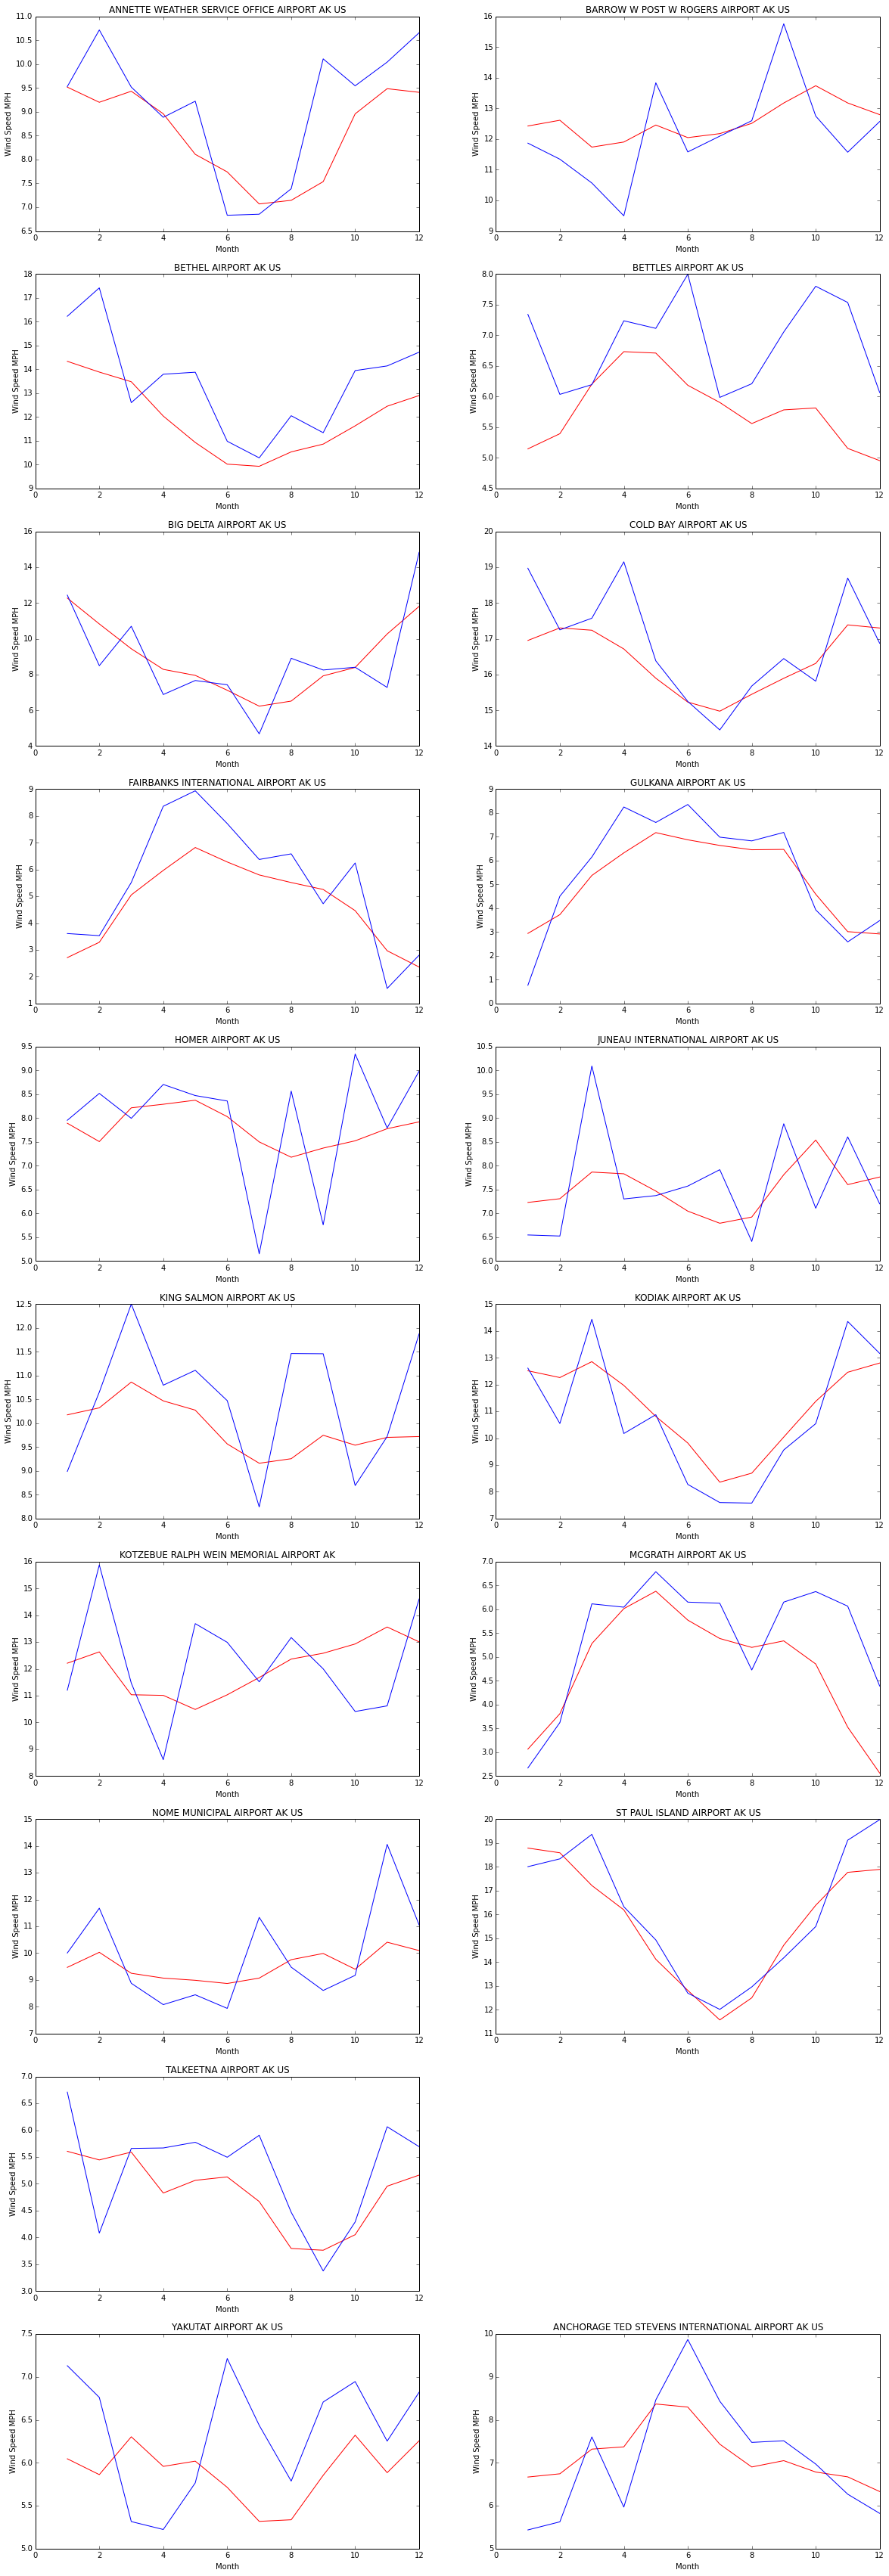

In [25]:
#plt.subplot(len(tmy_tuple)/2,2,location)
i = 0 
plt.ylabel('Wind Speed MPH')
plt.xlabel('Month')
print 'RED lines are NOAA Data, BlUE lines are TMY data'
for ids, location in tmy_tuple:
    if location != 'VALDEZ WEATHER SERVICE OFFICE AK US':
        plt.subplot(len(tmy_tuple)/2,2,i)
        plt.ylabel('Wind Speed MPH')
        plt.xlabel('Month')
        plt.title(location)
        #plt.figure(figsize=(3,1))
        plt.plot(monthly_wind.index.levels[1], monthly_wind.loc[location], 'r', tmy_monthly_wind.index.levels[1], 
             tmy_monthly_wind.loc[location], 'b')
        i = i + 1
    else:
        i = i + 1

In [26]:
# Prepare datasets to be combined
tmy_left = tmy_monthly_wind
noaa_right = monthly_wind
tmy_left.reset_index(inplace=True)
noaa_right.reset_index(inplace=True)
tmy_left = tmy_left.rename(columns = {'wind_speed_mph' : 'tmy_wind_speed'})
tmy_left

,STATION_NAME,MONTH,tmy_wind_speed
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,5.435709
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,5.624311
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,7.603197
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,5.967664
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,8.464600
5,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,6,9.872370
6,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,7,8.435135
7,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,8,7.475114
8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,9,7.513018
9,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,10,6.970299


In [27]:
noaa_right = noaa_right.rename(columns = {'WINDSPEED_MPH' : 'noaa_wind_speed'})
noaa_right

,STATION_NAME,MONTH,noaa_wind_speed
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,6.667876
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,6.743601
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,7.318439
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,7.370972
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,8.369624
5,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,6,8.298333
6,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,7,7.433602
7,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,8,6.902419
8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,9,7.049861
9,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,10,6.784543


In [28]:
# Combine the NOAA nad TMY datasets
wind_compare = pd.merge(tmy_left, noaa_right, left_on=['STATION_NAME', 'MONTH'], 
                        right_on=['STATION_NAME', 'MONTH'], how='left')
wind_compare = wind_compare[['STATION_NAME', 'MONTH', 'tmy_wind_speed', 'noaa_wind_speed']]
wind_compare

,STATION_NAME,MONTH,tmy_wind_speed,noaa_wind_speed
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,5.435709,6.667876
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,5.624311,6.743601
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,7.603197,7.318439
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,5.967664,7.370972
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,8.464600,8.369624
5,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,6,9.872370,8.298333
6,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,7,8.435135,7.433602
7,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,8,7.475114,6.902419
8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,9,7.513018,7.049861
9,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,10,6.970299,6.784543


In [29]:
# Calculate the difference between the noaa and tmy datasets.
wind_compare['percent_diff'] = (wind_compare.tmy_wind_speed - wind_compare.noaa_wind_speed) / wind_compare.tmy_wind_speed * 100
wind_compare['mph_diff'] = wind_compare.tmy_wind_speed - wind_compare.noaa_wind_speed
wind_compare

,STATION_NAME,MONTH,tmy_wind_speed,noaa_wind_speed,percent_diff,mph_diff
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,5.435709,6.667876,-22.668025,-1.232168
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,5.624311,6.743601,-19.900931,-1.119290
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,7.603197,7.318439,3.745243,0.284758
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,5.967664,7.370972,-23.515207,-1.403308
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,8.464600,8.369624,1.122042,0.094976
5,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,6,9.872370,8.298333,15.943858,1.574037
6,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,7,8.435135,7.433602,11.873346,1.001533
7,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,8,7.475114,6.902419,7.661350,0.572695
8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,9,7.513018,7.049861,6.164722,0.463157
9,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,10,6.970299,6.784543,2.664961,0.185756


In [30]:
wind_compare.describe()

,MONTH,tmy_wind_speed,noaa_wind_speed,percent_diff,mph_diff
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,6.425532,9.252532,8.924364,1.069325,0.328168
std,3.451401,3.839793,3.630888,24.649538,1.261688
min,1.000000,0.767896,2.362903,-283.296457,-2.987259
25%,3.000000,6.424293,6.244691,-5.431519,-0.503187
50%,6.000000,8.408376,8.109274,3.921495,0.358704
75%,9.000000,11.491387,11.472379,12.583478,1.109121
max,12.000000,19.973726,18.781317,41.842343,3.648467


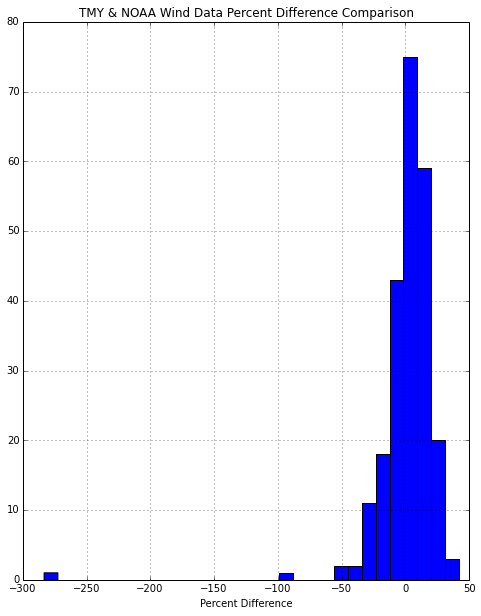

In [31]:
fig = plt.figure(figsize=(8, 10))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_xlabel("Percent Difference")
ax.set_title("TMY & NOAA Wind Data Percent Difference Comparison")
wind_compare['percent_diff'].hist(bins=30, ax=ax)

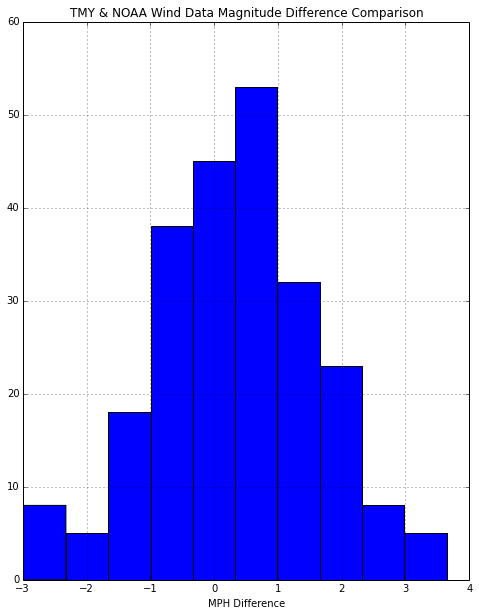

In [32]:
fig = plt.figure(figsize=(8, 10))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_xlabel("MPH Difference")
ax.set_title("TMY & NOAA Wind Data Magnitude Difference Comparison")
wind_compare['mph_diff'].hist(figsize=(8,10))

In [33]:
wind_compare.to_excel('AK_tmy&noaa_wind_comparison.xlsx', sheet_name="wind_comparison")

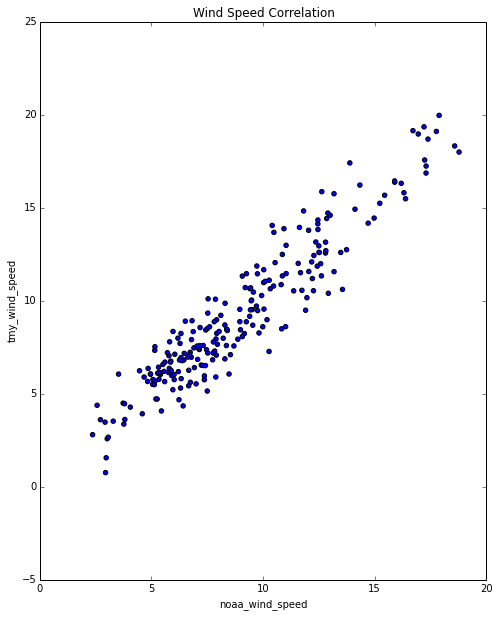

In [34]:
fig = plt.figure(figsize=(8, 10))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_xlabel("noaa_wind_speed")
ax.set_ylabel("tmy_wind_speed")
ax.set_title("Wind Speed Correlation")
plt.scatter(wind_compare['noaa_wind_speed'], wind_compare['tmy_wind_speed'])


In [35]:
# Create a fitted model
fitted_line = smf.ols(formula='noaa_wind_speed ~ tmy_wind_speed', data=wind_compare, missing='drop').fit()
fitted_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        noaa_wind_speed   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1925.
Date:                Mon, 15 Jun 2015   Prob (F-statistic):          1.32e-114
Time:                        11:52:09   Log-Likelihood:                -374.43
No. Observations:                 235   AIC:                             752.9
Df Residuals:                     233   BIC:                             759.8
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.6610      0.204      3.243      0.001         0.259     1.063
tmy_wind_speed     0.8931      0.020     43.876      0.000         0.853     0.933
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.499
Skew:                           0.222   Prob(JB):                        0.287
Kurtosis:                       2.759   Cond. No.                         26.4
==============================================================================
"""

In [36]:
fitted_line.params

Intercept         0.661004
tmy_wind_speed    0.893092
dtype: float64

In [37]:
# Create linear regression line
maxmindata = {'data': [wind_compare['noaa_wind_speed'].min(), wind_compare['noaa_wind_speed'].max()]
             }
maxmin = pd.DataFrame(maxmindata)
maxmin

# Create 1/1 slope line
perfect_linex = [0,5, 10, 15]
perfect_liney = [0,5,10,15]

In [38]:
# Create y values for line of best fit
yvals = maxmin['data'].map(lambda x:  0.718339 + 0.888453 * x)
yvals

0     2.817667
1    17.404657
Name: data, dtype: float64

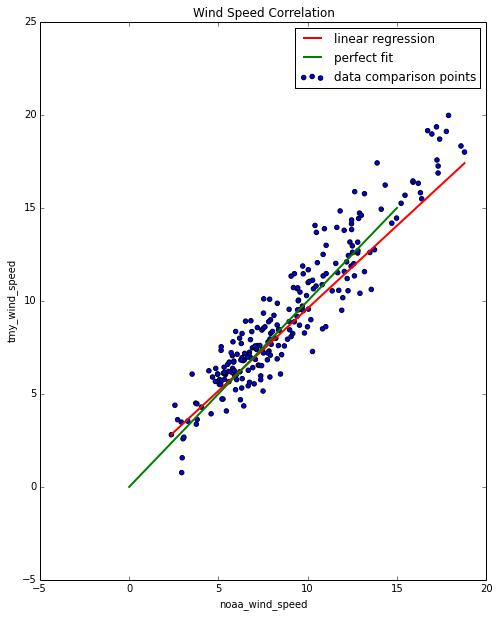

In [39]:
#Graphing Stuff
fig = plt.figure(figsize=(8, 10))

# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# Label graphs
ax.set_xlabel("noaa_wind_speed")
ax.set_ylabel("tmy_wind_speed")
ax.set_title("Wind Speed Correlation")

#plot lines
plt.scatter(wind_compare['noaa_wind_speed'], wind_compare['tmy_wind_speed'], label="data comparison points")
plt.plot(maxmin, yvals, c='red', linewidth=2, label="linear regression")
plt.plot(perfect_linex, perfect_liney, c='green', linewidth= 2, label="perfect fit")
plt.legend()

In [40]:
chunk = [20, 25, 30, 35]
total = len(wind_compare.index)
for x in chunk:
    negativex = x * -1
    bite = wind_compare.query("percent_diff >= @negativex & percent_diff <= @x")
    bite_total = len(bite.index)
    bite_percent = float(bite_total) / float(total) * 100
    print "%f percent of the %d TMY3 monthly average wind speeds in 20 communities are within +/- %d percent of NOAA values." % (bite_percent, total, x)

81.702128 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 20 percent of NOAA values.
89.361702 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 25 percent of NOAA values.
94.893617 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 30 percent of NOAA values.
96.595745 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 35 percent of NOAA values.


In [41]:
chunk = [0.5, 1, 2]
total = len(wind_compare.index)
for x in chunk:
    x = float(x)
    negativex = x * -1
    bite = wind_compare.query("mph_diff >= @negativex & mph_diff <= @x")
    bite_total = len(bite.index)
    bite_percent = float(bite_total) / float(total) * 100
    print "%f percent of the %d TMY3 monthly average wind speeds in 20 communities are within +/- %f miles per hour of NOAA values." % (bite_percent, total, x)

32.340426 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 0.500000 miles per hour of NOAA values.
57.872340 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 1.000000 miles per hour of NOAA values.
85.957447 percent of the 235 TMY3 monthly average wind speeds in 20 communities are within +/- 2.000000 miles per hour of NOAA values.
